In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download nikitarom/planets-dataset

 99% 1.48G/1.50G [00:07<00:00, 176MB/s]
100% 1.50G/1.50G [00:07<00:00, 202MB/s]


In [6]:
! unzip planets-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: test-jpg-additional/test-jpg-additional/file_5499.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5507.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5508.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5509.jpg  
  inflating: test-jpg-additional/test-jpg-additional/fi

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model

In [68]:
train_df = pd.read_csv('planet/planet/train_classes.csv')
train_df

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road


In [69]:
!ls planet/planet/train-jpg | wc -l

40479


In [70]:
sample_df = pd.read_csv('planet/planet/sample_submission.csv')
sample_df

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water
...,...,...
61186,file_9995,primary clear agriculture road water
61187,file_9996,primary clear agriculture road water
61188,file_9997,primary clear agriculture road water
61189,file_9998,primary clear agriculture road water


In [71]:
test1 = !ls planet/planet/test-jpg | wc -l
test1

['40669']

In [72]:
test2 = !ls test-jpg-additional/test-jpg-additional | wc -l
test2

['20522']

In [73]:
float(test1[0]) + float(test2[0])

61191.0

#Get unique labels in train classes

In [74]:
classes = train_df.copy()
labels = set()
for tags in classes['tags']:
  for tag in tags.split():
    labels.add(tag)
labels = list(labels)
labels

['cloudy',
 'haze',
 'habitation',
 'slash_burn',
 'bare_ground',
 'conventional_mine',
 'artisinal_mine',
 'water',
 'road',
 'blooming',
 'primary',
 'clear',
 'cultivation',
 'partly_cloudy',
 'blow_down',
 'agriculture',
 'selective_logging']

#Check if data contain duplicate entries

In [75]:
assert len(classes['image_name'].unique())==classes.shape[0]

#Applying hot encoding in labels in classes

In [76]:
for tag in labels:
  classes[tag] = classes['tags'].apply(lambda x: 1 if tag in x.split() else 0)

classes['image_name'] = classes['image_name'].apply(lambda x: '{}.jpg'.format(x))
classes

,image_name,tags,cloudy,haze,habitation,slash_burn,bare_ground,conventional_mine,artisinal_mine,water,road,blooming,primary,clear,cultivation,partly_cloudy,blow_down,agriculture,selective_logging
0,train_0.jpg,haze primary,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train_1.jpg,agriculture clear primary water,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0
2,train_2.jpg,clear primary,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,train_3.jpg,clear primary,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474.jpg,clear primary,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
40475,train_40475.jpg,cloudy,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40476,train_40476.jpg,agriculture clear primary,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
40477,train_40477.jpg,agriculture clear primary road,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0


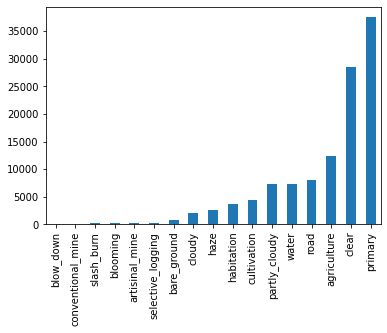

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

classes[labels].sum().sort_values().plot.bar()

,cloudy,haze,habitation,slash_burn,bare_ground,conventional_mine,artisinal_mine,water,road,blooming,primary,clear,cultivation,partly_cloudy,blow_down,agriculture,selective_logging
cloudy,2089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
haze,0,2697,129,3,41,2,5,613,394,4,2670,0,202,0,0,672,5
habitation,0,129,3660,41,163,36,29,915,2786,4,3469,3090,895,441,3,2737,13
slash_burn,0,3,41,209,10,0,0,24,36,2,209,173,126,33,2,119,2
bare_ground,0,41,163,10,862,10,40,206,323,3,683,747,89,74,4,225,13
conventional_mine,0,2,36,0,10,100,4,26,59,0,94,70,4,28,0,24,0
artisinal_mine,0,5,29,0,40,4,339,299,110,0,324,307,18,27,0,38,6
water,0,613,915,24,206,26,299,7411,2125,16,7001,5502,868,1295,3,2712,49
road,0,394,2786,36,323,59,110,2125,8071,10,7728,6295,1294,1382,2,6034,151
blooming,0,4,4,2,3,0,0,16,10,332,332,311,35,17,1,32,7


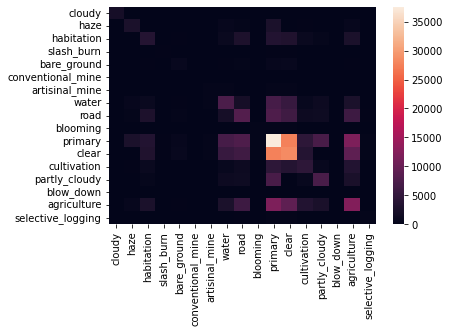

In [78]:
import seaborn as sns
def make_cooccurence_matrix(labels):
    numeric_df = classes[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix
    
# Compute the co-ocurrence matrix
make_cooccurence_matrix(labels)

,clear,partly_cloudy,haze,cloudy
clear,28431,0,0,0
partly_cloudy,0,7261,0,0
haze,0,0,2697,0
cloudy,0,0,0,2089


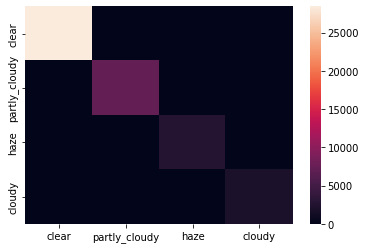

In [79]:
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
make_cooccurence_matrix(weather_labels)

,primary,agriculture,water,cultivation,habitation
primary,37513,11972,7001,4455,3469
agriculture,11972,12315,2712,3377,2737
water,7001,2712,7411,868,915
cultivation,4455,3377,868,4477,895
habitation,3469,2737,915,895,3660


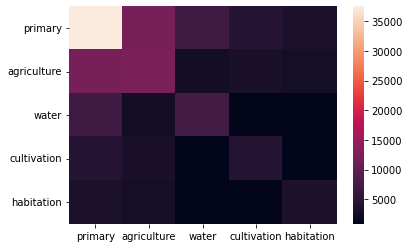

In [80]:
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
make_cooccurence_matrix(land_labels)

,slash_burn,bare_ground,conventional_mine,artisinal_mine,blooming,blow_down,selective_logging
slash_burn,209,10,0,0,2,2,2
bare_ground,10,862,10,40,3,4,13
conventional_mine,0,10,100,4,0,0,0
artisinal_mine,0,40,4,339,0,0,6
blooming,2,3,0,0,332,1,7
blow_down,2,4,0,0,1,98,1
selective_logging,2,13,0,6,7,1,340


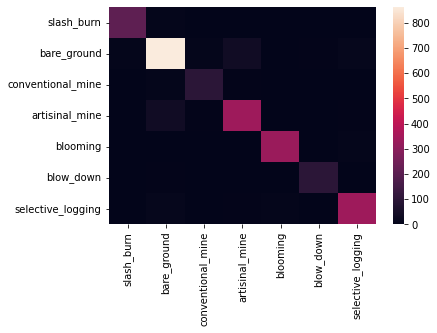

In [81]:
rare_labels = [l for l in labels if classes[labels].sum()[l] < 2000]
make_cooccurence_matrix(rare_labels)

#importing tensorflow libraries

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [83]:
columns = list(classes.columns[2:])
columns

['cloudy',
 'haze',
 'habitation',
 'slash_burn',
 'bare_ground',
 'conventional_mine',
 'artisinal_mine',
 'water',
 'road',
 'blooming',
 'primary',
 'clear',
 'cultivation',
 'partly_cloudy',
 'blow_down',
 'agriculture',
 'selective_logging']

In [84]:
def fbeta(y_true, y_pred, beta = 2, epsilon = 1e-4):
    
    beta_squared = beta**2
    
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)
    
    tp = tf.reduce_sum(y_true * y_pred, axis = 1)
    fp = tf.reduce_sum(y_pred, axis = 1) - tp
    fn = tf.reduce_sum(y_true, axis = 1) - tp
    
    precision = tp/(tp+fp+epsilon)
    recall = tp/(tp+fn+epsilon)
    
    fb = (1+beta_squared)*precision*recall / (beta_squared*precision+recall+epsilon)
    return fb

In [85]:
def multi_label_acc(y_true, y_pred, epsilon = 1e-4):
    
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)
    
    tp = tf.reduce_sum(y_true * y_pred, axis = 1)
    fp = tf.reduce_sum(y_pred, axis = 1) - tp
    fn = tf.reduce_sum(y_true, axis = 1) - tp
    
    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)
        
    tn = tf.reduce_sum(tf.cast(tf.logical_not(y_true), tf.float32) * tf.cast(tf.logical_not(y_pred), tf.float32), 
                       axis = 1)
    return (tp+tn)/(tp+tn+fp+fn+epsilon)

#defining model

In [86]:
def build_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(128, 128, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(17, activation='sigmoid'))

    opt = Adam(learning_rate=1e-4)

    model.compile(loss='binary_crossentropy',
              # We NEED binary here, since categorical_crossentropy l1 norms the output before calculating loss.
              optimizer=opt,
              metrics=[multi_label_acc, fbeta])

    return model

In [87]:
#modelcheckpoint is set to monitor the model using validation fbeta score and save the best only
save_best_check_point = ModelCheckpoint(filepath = 'best_model.hdf5', monitor = 'val_fbeta', mode = 'max',
                                       save_best_only = True, save_weights_only = True)

In [88]:
#initializing imagedatagenerator with a validation split of 0.2
train_image_gen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

#generating train data generator which is 80% of the train dataset
#note that a generator contains both features and target of the data
train_generator = train_image_gen.flow_from_dataframe(dataframe=classes,
                                                directory ="planet/planet/train-jpg",  
                                                x_col="image_name", y_col=columns, subset="training", 
                                                batch_size=12,seed=2022, shuffle=True, 
                                                class_mode="raw", target_size=(128,128))

#generating validation data which is expected to be 20% of the train dataset since validation split is 0.2
val_generator = train_image_gen.flow_from_dataframe(dataframe=classes,
                                                directory ="planet/planet/train-jpg",  
                                                x_col="image_name", y_col=columns, subset="validation", 
                                                batch_size=12,seed=2022, shuffle=True, 
                                                class_mode="raw", target_size=(128,128))

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [89]:
step_train_size = int(np.ceil(train_generator.samples / train_generator.batch_size))
step_val_size = int(np.ceil(val_generator.samples / val_generator.batch_size))

#Build a model for training

In [90]:
model1 = build_model()

In [91]:
model1.fit(x = train_generator, steps_per_epoch = step_train_size, validation_data = val_generator, 
           validation_steps = step_val_size,epochs = 25, 
           callbacks = [save_best_check_point])

Epoch 1/25
2699/2699 [==============================] - 178s 65ms/step - loss: 0.2144 - multi_label_acc: 0.9173 - fbeta: 0.7023 - val_loss: 0.1601 - val_multi_label_acc: 0.9388 - val_fbeta: 0.7779
Epoch 2/25
2699/2699 [==============================] - 174s 64ms/step - loss: 0.1606 - multi_label_acc: 0.9365 - fbeta: 0.7896 - val_loss: 0.1470 - val_multi_label_acc: 0.9419 - val_fbeta: 0.7887
Epoch 3/25
2699/2699 [==============================] - 172s 64ms/step - loss: 0.1437 - multi_label_acc: 0.9433 - fbeta: 0.8166 - val_loss: 0.1327 - val_multi_label_acc: 0.9477 - val_fbeta: 0.8220
Epoch 4/25
2699/2699 [==============================] - 173s 64ms/step - loss: 0.1348 - multi_label_acc: 0.9466 - fbeta: 0.8310 - val_loss: 0.1372 - val_multi_label_acc: 0.9456 - val_fbeta: 0.8116
Epoch 5/25
2699/2699 [==============================] - 171s 64ms/step - loss: 0.1280 - multi_label_acc: 0.9494 - fbeta: 0.8413 - val_loss: 0.1194 - val_multi_label_acc: 0.9526 - val_fbeta: 0.8497
Epoch 6/25
2699

In [92]:
sample_classes = sample_df.copy()
sample_classes['image_name'] = sample_classes['image_name'].apply(lambda x: '{}.jpg'.format(x))
sample_classes

,image_name,tags
0,test_0.jpg,primary clear agriculture road water
1,test_1.jpg,primary clear agriculture road water
2,test_2.jpg,primary clear agriculture road water
3,test_3.jpg,primary clear agriculture road water
4,test_4.jpg,primary clear agriculture road water
...,...,...
61186,file_9995.jpg,primary clear agriculture road water
61187,file_9996.jpg,primary clear agriculture road water
61188,file_9997.jpg,primary clear agriculture road water
61189,file_9998.jpg,primary clear agriculture road water


#Build another model to make prediction

In [93]:
model2 = build_model()
model2.load_weights('best_model.hdf5')

In [94]:
test1 = sample_classes.iloc[:40669]['image_name'].reset_index().drop('index', axis =1)
print(test1.shape)
test1

(40669, 1)


,image_name
0,test_0.jpg
1,test_1.jpg
2,test_2.jpg
3,test_3.jpg
4,test_4.jpg
...,...
40664,test_40664.jpg
40665,test_40665.jpg
40666,test_40666.jpg
40667,test_40667.jpg


In [95]:
test_image_gen = ImageDataGenerator(rescale = 1/255)

test_generator1 = test_image_gen.flow_from_dataframe(dataframe=test1, 
                                                directory="planet/planet/test-jpg", 
                                                x_col="image_name", y_col=None, batch_size=16, 
                                                shuffle=False, class_mode=None, target_size=(128,128))

step_test_size1 = int(np.ceil(test_generator1.samples / test_generator1.batch_size))

Found 40669 validated image filenames.


In [96]:
#reset generator to avoid shuffling
test_generator1.reset()
pred1 = model2.predict(test_generator1, steps = step_test_size1, verbose = 1)

2542/2542 [==============================] - 119s 47ms/step


In [97]:
test_file_names1 = test_generator1.filenames # storing the filenames (images names) of the first 40669 images names in 
                                       # the sample submission dataframe as ordered in the prediction as a 
                                       # variable

# converting the predictions of the first 40669 to tag names
pred_tags1 = pd.DataFrame(pred1)
pred_tags1 = pred_tags1.apply(lambda x: ' '.join(np.array(labels)[x > 0.5]), axis=1)

# converting the predictions of the first 40669 to a dataframe
result1 = pd.DataFrame({'image_name': test_file_names1, 'tags': pred_tags1})
result1.head()

,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear
2,test_2.jpg,primary partly_cloudy
3,test_3.jpg,primary clear cultivation agriculture
4,test_4.jpg,cloudy partly_cloudy


In [98]:
test2 = sample_classes.iloc[40669:]['image_name'].reset_index().drop('index', axis =1)
print(test2.shape)
test2

(20522, 1)


,image_name
0,file_0.jpg
1,file_1.jpg
2,file_10.jpg
3,file_100.jpg
4,file_1000.jpg
...,...
20517,file_9995.jpg
20518,file_9996.jpg
20519,file_9997.jpg
20520,file_9998.jpg


In [99]:
test_generator2 = test_image_gen.flow_from_dataframe(dataframe=test2, 
                                                directory="test-jpg-additional/test-jpg-additional", 
                                                x_col="image_name", y_col=None, batch_size=16, 
                                                shuffle=False, class_mode=None, target_size=(128,128))

step_test_size2 = int(np.ceil(test_generator2.samples/test_generator2.batch_size))

Found 20522 validated image filenames.


In [100]:
test_generator2.reset()
pred2 = model2.predict(test_generator2, steps = step_test_size2, verbose = 1)

1283/1283 [==============================] - 60s 47ms/step


In [101]:
test_file_names2 = test_generator2.filenames

pred_tags2 = pd.DataFrame(pred2)
pred_tags2 = pred_tags2.apply(lambda x: ' '.join(np.array(labels)[x > 0.5]), axis=1)

result2 = pd.DataFrame({'image_name': test_file_names2, 'tags': pred_tags2})
result2.head()

,image_name,tags
0,file_0.jpg,primary clear
1,file_1.jpg,road primary partly_cloudy agriculture
2,file_10.jpg,water road primary agriculture
3,file_100.jpg,water primary clear
4,file_1000.jpg,primary clear


In [102]:
final_result = pd.concat([result1, result2])
final_result = final_result.reset_index().drop('index', axis =1)

In [103]:
final_result.shape

(61191, 2)

In [104]:
final_result

,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear
2,test_2.jpg,primary partly_cloudy
3,test_3.jpg,primary clear cultivation agriculture
4,test_4.jpg,cloudy partly_cloudy
...,...,...
61186,file_9995.jpg,cloudy
61187,file_9996.jpg,water primary clear
61188,file_9997.jpg,water primary clear
61189,file_9998.jpg,cloudy


In [105]:
final_result['image_name'] = final_result['image_name'].apply(lambda x: x[:-4])
final_result

,image_name,tags
0,test_0,primary clear
1,test_1,primary clear
2,test_2,primary partly_cloudy
3,test_3,primary clear cultivation agriculture
4,test_4,cloudy partly_cloudy
...,...,...
61186,file_9995,cloudy
61187,file_9996,water primary clear
61188,file_9997,water primary clear
61189,file_9998,cloudy


In [106]:
final_result.to_csv('final_submission.csv', index = False)